# Майнор "Интеллектуальный анализ данных"

# Курс "Прикладные задачи анализа данных"

## Лабораторная работа №2. RecSys

В рамках данной лабораторной работы вам предлагается решить задачу рекомендательной системы на основе следующих данных:

* **rating.csv** - рейтинги аниме по 10 бальной шкале
* **anime.csv** - описание items

Скачать данные можно [здесь](https://drive.google.com/drive/u/1/folders/1FarHUuqQq4tQSlERB9K8uEfZAZT9tQWv)

# Данные

Данные содержат информацию об предподчтениях 73,516 пользователей в 12,294 аниме. Каждый пользователь может добавить аниме и выставить рейтниг.

Anime.csv

* anime_id - идентификатор аниме (items)
* name - полное название аниме
* genre - категория/категории для аниме (разделены запятой).
* type - тип: movie, TV, OVA, etc.
* episodes - количество эпизодов (для экранизаций)
* rating - средний рейтинг по аниме.
* members - количество членов коммьюнити к аниме

Rating.csv

* user_id - идентификатор пользователя (users)
* anime_id - идентификатор аниме
* rating - рейтинг пользователя по аниме (-1 пользователь смотрел, но не оставил рейтинг).

### ``` Если вычеслительные ресурсы не позволяют решить задачу на всех данных, то необходимо это сделать на "сэмпле" данных (выбрав от 5% ids' для user и item). Этот же подход справедлив и для оценки работы алгоритомв```

In [1]:
import numpy as np
import pandas as pd

In [3]:
# взяли больше чем 10 % данных, но это только для SVD-based алгоритмов
# для нейронной колоборативной фильтрации будем использовать больше семплов, если позволит мощность

# хотя, 800К это достаточно, получается репрезентативная выборка.

num_count = 800000
anime_count = 2000


In [4]:
data = pd.read_csv("rating.csv")
anime = pd.read_csv("anime.csv")

In [5]:
data = data.head(num_count)

data_array = data.values

anime = anime[anime["anime_id"] < anime_count]

In [8]:
data.user_id.unique(), data.user_id.unique().size

(array([   1,    2,    3, ..., 7385, 7386, 7387], dtype=int64), 7387)

In [9]:
data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
799995,7387,1689,9
799996,7387,1698,10
799997,7387,1840,8
799998,7387,1864,6


In [11]:
unique_users = data["user_id"].unique().size
matrix = np.zeros(
    (unique_users, anime_count), 
    np.int16)

c = [0] * anime_count
for item in anime.values:
    c[ item[0]-1] =  item[1]

# matrix_data = pd.DataFrame(matrix, columns=c)

In [12]:
np.count_nonzero(matrix)

0

In [15]:
for r in data_array:
    if r[1] <= anime_count:
        matrix[r[0] - 1][r[1] - 1] = r[2]
        
def fig(data):
    sns_plot = sns.distplot(data, color="red")
    fig = sns_plot.get_figure()


In [16]:
np.count_nonzero(matrix)

254713

In [17]:
def figure(data):
    sns_plot = sns.distplot(data, color="purple")
    fig = sns_plot.get_figure()

In [26]:
# подготовку завершили, можно посчитать статистику 

In [27]:
import warnings
warnings.filterwarnings("ignore")

## Необходимо сделать:

### Задание №1 : Exploratory analysis (2 балла):

* Распределение числа пользователей по количеству взаимодействий
* Разпределение числа "айтемов" по количеству взаимодействий
* Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"
* и т.д. (бонус)

In [21]:
import seaborn as sns

from matplotlib import pyplot as plt

In [22]:
n = np.zeros(unique_users)

for i, x in enumerate(matrix):
    n[i] += np.count_nonzero(x)

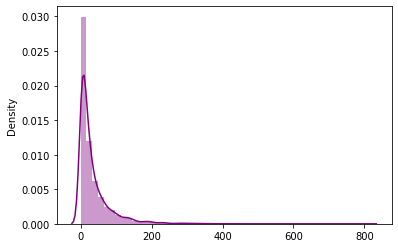

In [23]:
figure(n)

In [24]:
n = np.zeros(anime_count) # разреженность по взаимодействиям с юзерами

for i in range(anime_count):
    x = matrix[:, i][matrix[:, i]!=0]
    n[i] += np.count_nonzero(x)
    


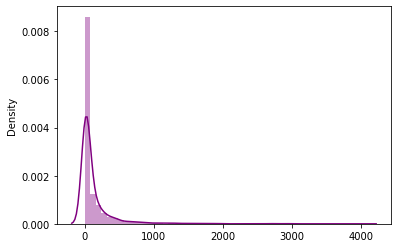

In [25]:
figure(n) # разреженность по аниме (сколько взаимодействий)

In [28]:
# видно, что выделяется 0, потому что данные разрежены, и у каждого почти семпла от силы по 5-10 оценок

In [33]:
user_rating = np.zeros(unique_users)
anime_rating = np.zeros(anime_count)

for i, x in enumerate(matrix):
    user_rating[i] = np.mean(x[x != 0])
    
for i in range(anime_count):
    elem = matrix[:, i][matrix[:, i]!=0]
    anime_rating[i] = np.mean(elem)

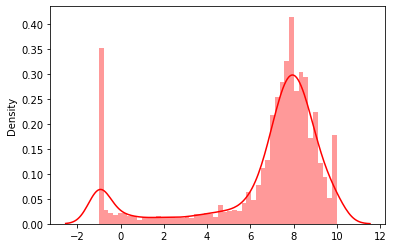

In [35]:
fig(user_rating[user_rating != 0])

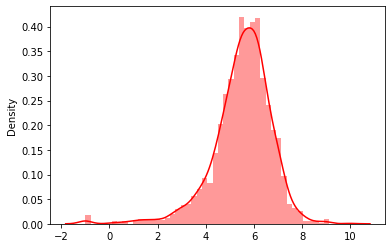

In [36]:
fig(anime_rating)

In [38]:
# вывод такой, что оценки имеют нормальное распределение

### Задание №2 : Оценить разреженность данных по рейтингу (1/2 балла)

In [44]:
# данные очень разреженные. 

# нарисуем карту температур и посмотрим на количество оценок от общего числа элементов в матрице рекомендаций

<AxesSubplot:>

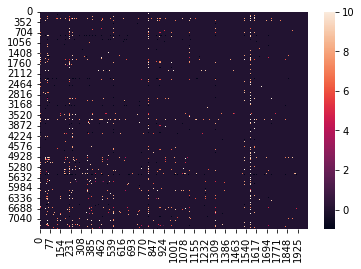

In [45]:
sns.heatmap(matrix)

In [46]:
np.count_nonzero(matrix) / matrix.size

0.017240625423040477

### Задание №3 : Разделить данные на тренировочные и валидационные (1/2 балла)

In [48]:
train_svd = matrix[:4500]
val_svd = matrix[4500:]

In [66]:
def argmax(a, k):
    return np.argpartition(a, -k)[-k:]

In [87]:
data_train = data[:120_000]
data_train = data_train[data_train.anime_id < anime_count]

data_val = data[120_000:150_000]
data_val = data_val[data_val.anime_id < anime_count]

In [88]:
data_val.shape

(6130, 3)

### Задание №4 : Решить задачу на основе предложения всем юзерам наиболее популярных item (1 балл)

In [54]:
def max_pop_model(user_id, k=5):
    train_volume = 500
    var = matrix[np.random.choice(len(matrix), 
                                  size=train_volume, 
                                  replace=False)]
    s = np.zeros(anime_count)
    for i in range(anime_count):
        s[i] = np.sum(var[:, i])
        
    return np.argpartition(s, -k)[-k:]

In [56]:
pred = max_pop_model(0)

In [57]:
anime.iloc[pred]

,anime_id,name,genre,type,episodes,rating,members
817,474,Macross Plus,"Drama, Mecha, Military, Romance, Sci-Fi, Space",OVA,4,7.82,23138
729,1887,Lucky☆Star,"Comedy, Parody, School, Slice of Life",TV,24,7.87,305837
456,227,FLCL,"Action, Comedy, Dementia, Mecha, Parody, Sci-Fi",OVA,6,8.06,305165
6551,858,Gunparade Orchestra,"Drama, Mecha, Military, Romance, Sci-Fi, Slice...",TV,24,6.06,2816
6230,1055,Blame!,"Mecha, Sci-Fi",ONA,6,6.20,13802


### Задание №5 : Решить задачу на основе коллоборативной фильтрации (2 балла)

* Реализовать один из методов коллоборативной фильтрации SVD, SVD++, ALS, ALS with implicit feedback

In [58]:
# Будем решать на основе факторизационных векторов SVD
# по факту эти вектора - своеобразные эмбединги

In [59]:
from numpy.linalg import svd

param = 32

u, d, v = svd(matrix)

U = u[:, :param]
D = np.diag(d)[:param, :param]
V = v[:param, :]

In [60]:
svd_pred = U @ D @ V

In [64]:
def svd_base_model(user_id, k=5):
    return argmax(svd_pred[user_id], k)

In [67]:
pred = svd_base_model(0)

In [68]:
pred

array([148, 242,   5,   4,   0], dtype=int64)

In [69]:
anime.iloc[pred]

,anime_id,name,genre,type,episodes,rating,members
550,597,Neko no Ongaeshi,"Adventure, Drama, Fantasy",Movie,1,7.98,92499
884,531,Bishoujo Senshi Sailor Moon R: The Movie,"Drama, Magic, Romance, Shoujo",Movie,1,7.78,33682
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
20,263,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679


In [70]:
anime.iloc[pred].describe()

,anime_id,rating,members
count,5.00000,5.000000,5.000000
mean,451.00000,8.506000,98767.400000
std,302.02235,0.587052,47446.748575
min,44.00000,7.780000,33682.000000
25%,263.00000,7.980000,80679.000000
50%,531.00000,8.830000,92499.000000
75%,597.00000,8.830000,129307.000000
max,820.00000,9.110000,157670.000000


### Задание №6 Решить задачу на основе контент-based подхода, выбрав один из методов решения (2 балла):

* На основание векторов с факторизационной матрицы
* При помощи "ембеддингов"  item'ов

In [71]:
# Совместим эти 2 метода. Используем всю информацию, чтобы обучить модель.

In [72]:
import torch
from torch import nn

dev = torch.device("cuda:0")

In [73]:
text_columns = ["name", "genre", ]
categorical_columns = ["type", ]
numeric_columns = ["episodes", "rating", "members", ]

anime[categorical_columns] = anime[categorical_columns].fillna('NaN')
anime[text_columns] = anime[text_columns].fillna('NaN')
anime[numeric_columns] = anime[numeric_columns].fillna(0)
anime[numeric_columns] = anime[numeric_columns].replace("Unknown", 0)

anime[numeric_columns].describe()

,rating,members
count,1821.000000,1.821000e+03
mean,7.009259,3.175434e+04
std,0.735607,7.064724e+04
min,2.370000,2.150000e+02
25%,6.570000,3.244000e+03
50%,7.050000,8.750000e+03
75%,7.480000,2.846200e+04
max,9.110000,1.013917e+06


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
anime[numeric_columns] = scaler.fit_transform(anime[numeric_columns])

In [89]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter
import nltk

tokenizer = nltk.tokenize.WordPunctTokenizer()
anime[text_columns] = anime[text_columns].applymap(lambda x: " ".join(tokenizer.tokenize(x.lower())))

token_counts = Counter()

for col in text_columns:
    for line in anime[col].values:
        token_counts.update(line.split(" "))

min_count = 10

tokens = sorted(t for t, c in token_counts.items() if c >= min_count)

UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

token_to_id = {t: i for i, t in enumerate(tokens)}

UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

anime_name_tokens = as_matrix(anime.name.array)

NAME = np.zeros((anime_count, anime_name_tokens.shape[-1]))

for i in range(len(anime_name_tokens)):
    NAME[anime.iloc[i]["anime_id"] - 1] = anime_name_tokens[i]
    
anime_genre_tokens = as_matrix(anime.genre.array)

GENRE = np.zeros((anime_count, anime_genre_tokens.shape[-1]))

for i in range(len(anime_genre_tokens)):
    GENRE[anime.iloc[i]["anime_id"] - 1] = anime_genre_tokens[i]
    
top_categories, top_counts = zip(*Counter(anime["type"]).most_common(1000))
recognized_categories = set(top_categories)
anime["type"] = anime["type"].apply(lambda t: t if t in recognized_categories else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(anime[categorical_columns].apply(dict, axis=1))

CATEGORICAL = np.zeros((anime_count, 6)) 
categorical = categorical_vectorizer.transform(anime[categorical_columns].apply(dict, axis=1))

for i in range(len(categorical)):
    CATEGORICAL[anime.iloc[i]["anime_id"] - 1] = categorical[i]

NUMERICAL = np.zeros((anime_count, len(numeric_columns)))
num = anime[numeric_columns].values

for i in range(len(num)):
    NUMERICAL[anime.iloc[i]["anime_id"] - 1] = num[i]
    
from torch.utils.data import Dataset, DataLoader

class NCFData(Dataset):
    
    def __init__(self, data, dev):
        self.data = data
        self.dev = dev
        
    def __len__(self):
        return len(self.data.values)
    
    def __getitem__(self, idx):
        u_id = self.data.values[idx][0]
        a_id = self.data.values[idx][1]
        
        label = self.data.values[idx][2]
        
        Ux = torch.Tensor(U[u_id - 1]).to(dev)
        Vx = torch.Tensor(V[:, a_id - 1]).to(dev)
        Name = torch.LongTensor(NAME[a_id - 1]).to(dev)
        Genre = torch.LongTensor(GENRE[a_id - 1]).to(dev)
        Cat = torch.Tensor(CATEGORICAL[a_id - 1]).to(dev)
        Num = torch.Tensor(NUMERICAL[a_id - 1]).to(dev)
        
        return [[Ux, Vx, Name, Genre, Cat, Num], torch.Tensor([label]).to(self.dev)]

In [90]:
dataset_train = NCFData(data_train, dev)
dataset_val = NCFData(data_val, dev)

In [91]:
batch_size = 50

In [92]:
train_loader = DataLoader(dataset_train, batch_size=batch_size)
val_loader = DataLoader(dataset_val, batch_size=batch_size)

In [93]:
class Network(nn.Module):
    
    def __init__(self, emb_size=32, voc_size=len(tokens), k=10, linear_size=32):
        super().__init__()
        self.k = k
        self.emb_size = emb_size
        self.voc_size = voc_size
        self.linear_size = linear_size
        
        self.U_linear = nn.Sequential(
            nn.LazyLinear(linear_size),
            nn.ReLU(),
        )
        
        self.V_linear = nn.Sequential(
            nn.LazyLinear(linear_size),
            nn.ReLU(),
        )
        
        self.U_V_linear = nn.Sequential(
            nn.LazyLinear(linear_size),
            nn.ReLU(),
        )
        
        self.Embedder = nn.Embedding(voc_size, emb_size)
        
        self.N_encoder = nn.Sequential(
            nn.LazyConv1d(linear_size, kernel_size=2),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=linear_size // 2),
            nn.Flatten(start_dim=1),
        )
        
        self.G_encoder = nn.Sequential(
            nn.LazyConv1d(linear_size, kernel_size=2),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(output_size=linear_size // 2),
            nn.Flatten(start_dim=1),
        )
        
        self.C_linear = nn.Sequential(
            nn.LazyLinear(linear_size),
            nn.ReLU(),
        )
        
        self.N2_linear = nn.Sequential(
            nn.LazyLinear(linear_size),
            nn.ReLU(),
        )
        
        self.Filter = nn.Sequential(
            nn.LazyLinear(linear_size * 8),
            nn.ReLU(),
            nn.LazyLinear(linear_size * 4),
            nn.ReLU(),
            nn.LazyLinear(1),
        )
        
    def forward(self, batch):
        U = batch[0]
        V = batch[1]
        N = batch[2]
        G = batch[3]
        C = batch[4]
        N2 = batch[5]

        U_features = self.U_linear(U)
        V_features = self.V_linear(V)
        UV_features = torch.cat([U_features, V_features], dim=1)
        UV_features = self.U_V_linear(UV_features)
        
        N_emb = self.Embedder(N).permute(0, 2, 1)
        G_emb = self.Embedder(G).permute(0, 2, 1)
        
        N_features = self.N_encoder(N_emb)
        G_features = self.G_encoder(G_emb)
        
        C_features = self.C_linear(C)
        N2_features = self.N2_linear(N2)
        
        
        features = torch.cat(
            [UV_features,
            N_features,
            G_features,
            C_features,
            N2_features,], dim=1
        )
        
        prediction = self.Filter(features)
        
        return prediction

In [94]:
from tqdm.notebook import tqdm

In [95]:
model = Network().cuda()

In [96]:
model

Network(
  (U_linear): Sequential(
    (0): LazyLinear(in_features=0, out_features=32, bias=True)
    (1): ReLU()
  )
  (V_linear): Sequential(
    (0): LazyLinear(in_features=0, out_features=32, bias=True)
    (1): ReLU()
  )
  (U_V_linear): Sequential(
    (0): LazyLinear(in_features=0, out_features=32, bias=True)
    (1): ReLU()
  )
  (Embedder): Embedding(158, 32)
  (N_encoder): Sequential(
    (0): LazyConv1d(0, 32, kernel_size=(2,), stride=(1,))
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): AdaptiveMaxPool1d(output_size=16)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (G_encoder): Sequential(
    (0): LazyConv1d(0, 32, kernel_size=(2,), stride=(1,))
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): AdaptiveMaxPool1d(output_size=16)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (C_linear): Sequential(
    (0): LazyLinear(in_features=0, out_features=32, bias=True)
    (1): ReLU()
  )
  (N2_linear): Sequential(
    (0): LazyLinear(in_features=0, 

In [100]:
def train(model, 
          epochs=10, 
          lr=0.001, 
          cr=torch.nn.MSELoss()):

    opt = torch.optim.Adam(model.parameters(), lr=lr)
    
    losses = []
    
    for ep in range(epochs):
        model.train()
        train_loss = 0
        c = 0
        
        for batch in tqdm(train_loader): 
            c += 1
            labels = batch[1].squeeze()
            out = model(batch[0]).squeeze()
            opt.zero_grad()
            loss = cr(out, labels)
            loss.backward()
            train_loss += loss.item()
            opt.step()
            losses.append(loss.item())
            
        train_loss /= c
        loss_mean = 0
        c = 0
        
        for batch in tqdm(val_loader):
            c += 1
            model.eval()
            labels = batch[1].squeeze()
            out = model(batch[0]).squeeze()
            
            with torch.no_grad():
                loss = cr(out, labels)
                loss_mean += loss.item()
                
        loss_mean /= c
        
        print(f"Epoch {ep + 1} | train loss: {train_loss} | val loss: {loss_mean}")

    return losses

In [101]:
train_losses = train(model)

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 1 | train loss: 16.42715541756748 | val loss: 14.03309831192823


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 2 | train loss: 15.39529270054893 | val loss: 13.826259187566556


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 3 | train loss: 12.838946283304317 | val loss: 12.235074832187436


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 4 | train loss: 10.896652597816948 | val loss: 11.467914277945107


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 5 | train loss: 9.72380376897766 | val loss: 10.706897036816047


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 6 | train loss: 8.607527365415683 | val loss: 9.917966715688628


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 7 | train loss: 7.843745787571186 | val loss: 9.548764662044805


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 8 | train loss: 7.325748225801423 | val loss: 9.584250469517901


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 9 | train loss: 6.960881782974531 | val loss: 9.291818781596858


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 10 | train loss: 6.704807043454288 | val loss: 9.326218943649192


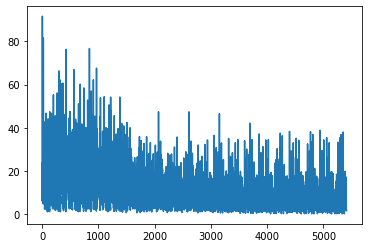

In [102]:
plt.plot(train_losses)

### Задание №7 Оценить работу алгоритмов выбрав одну из метрик, сделать вывод по результатам работы (2 балла):

* MAP@k
* NDCG@k
* MRR

In [103]:
from ml_metrics import mapk

In [104]:
def inference(user_id, 
              data_class, 
              model):
    
    test_id = user_id
    test_batch_array = [[test_id, x, -1] for x in range(anime_count)] 
    
    test = pd.DataFrame(test_batch_array, columns=data.columns) 
    
    test_data = data_class(test, dev)
    
    test_loader = DataLoader(test_data, batch_size=10) 
    
    
    preds = []
    recs = []
    pred = []
    
    model.eval()
    
    for batch in test_loader:
        p = model(batch[0])
        pred.append(p)
    
    final = torch.cat(pred, dim=1)
    return final

def make_mapk(model, 
              data_class):
    
    user_list = list(range(100))
    
    preds = []
    
    for user in user_list:
        pred = forward_model(user, data_class, model)
        preds.append(pred.detach().cpu().numpy().tolist())
        
    targets = []
    
    for eval_user in gen_list:
        targets.append(matrix[eval_user].tolist())
        
    return mapk(preds, targets)

In [105]:
make_mapk(model, NCFData)

0.7035881435257411


``` Бонус (1 балл) - дополнительные графики и характеристики в EDA и правильно сделанные выводы```

##### Выводы по результатам работы.

##### Базовая модель на основе максимального количества взаимодействий и рейтинга детерминированна относительно пользователя, поэтому не дает каких-то практических результатов.

##### SVD - оптимальна для небольшой выборки, т.к. алгоритмы факторизации не позволяют работать с большими объемами информации. SVD дает интуитивно "понятные" рекомендации. Даже на глаз видно, что все они похожи. Жанр, количество зрителей, тип аниме. Все кореллирует и вполне релевантно.

##### Регрессия по оценкам с помощью NCF дала результат чуть хуже, чем алгоритмы, осованные на коллаборативной фильтрации с помощью факторизации. Тем не менее, учитывались множество скрытых параметров, которые не смогли дать алгоритмы, основанные на классическом подходе. NCF  имеет бесконечный потенциал для улучшения, который выходит за рамки лабораторной работы. А я научился оперировать данными алгоритмами на достаточном уровне, чтобы написать собственную системуЮ основанную на похожем типе данных.

# ```Дедлайн - 08 июня 23:59```